## **Introducción a Machine Learning**

In [66]:
#Importamos las librerías a utilizar
#Fuente de datos: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd

Comencemos con la Regresión Lineal Simple

In [67]:
#Importamos los datos
#boston=datasets.load_boston()
boston=pd.read_excel('/content/sample_data/Boston House Prices Ok.xlsx')
print(boston)
print()

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [68]:
#Tarea, revisar ejercicio de precios de vivienda en California
#Fuente: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [69]:
housing.target.shape

(20640,)

In [70]:
#Verifico la información contenida en el dataset
print(boston.keys())
print()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')



In [71]:
#Verifico las caracteristicas el dataset
#print(boston.DESCR)
#print()
#Nos muestra que no hay datos faltantes, son 506 filas, 13 variables X y una variable y que es el atributo 14.

In [72]:
#Verifico las cantidad de datos del dataset
#print(boston.data.shape)
print(boston.shape)
print()

(506, 14)



In [73]:
#Verifico las columnas de datos del dataset
#print(boston.feature_names)
print(boston.columns)
print()
#Pero en primer lugar sólo usaremos la variable de Número de Habitaciones de la casa "RM"
#Así haremos una regresión lineal simple

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')



In [74]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [87]:
#Seleccionamos solamente la columna 5 del data set
#X=boston.data[:,np.newaxis,5]
X=boston[['RM']]

In [88]:
#Defino los datos de la variable y
#y=boston.target
y=boston[['MEDV']]

In [89]:
X.columns

Index(['RM'], dtype='object')

In [83]:
x = X['X'].values.reshape(-1, 1)

AttributeError: ignored

In [85]:
y.shape

(506,)

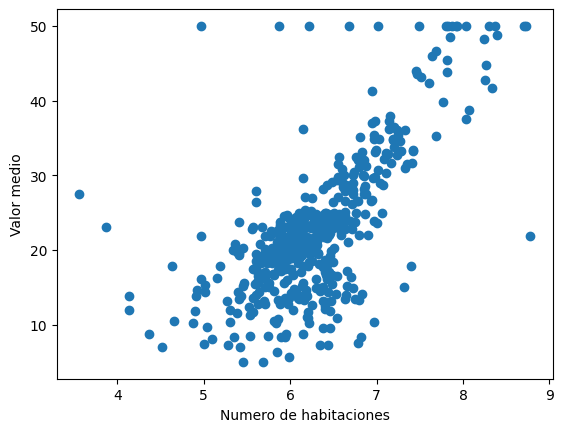

In [90]:
#Graficamos los datos
plt.scatter(X,y)
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio')
plt.show()

## **REGRESIÓN LINEAL SIMPLE**

In [91]:
#IMPLEMETACION DE LA REGRESION LINEAL SIMPLE
from sklearn.model_selection import train_test_split

#separo los datos de train (entrenamiento) y test (prueba) para probar el algortimo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Se usa 20% de datos para prueba

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [93]:
lr_multiple=linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_train,y_train)

LinearRegression()

In [94]:
#Defino el modelo a utilizar
lr=linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, y_train)
#Realizo la prediccion
y_pred=lr.predict(X_test)

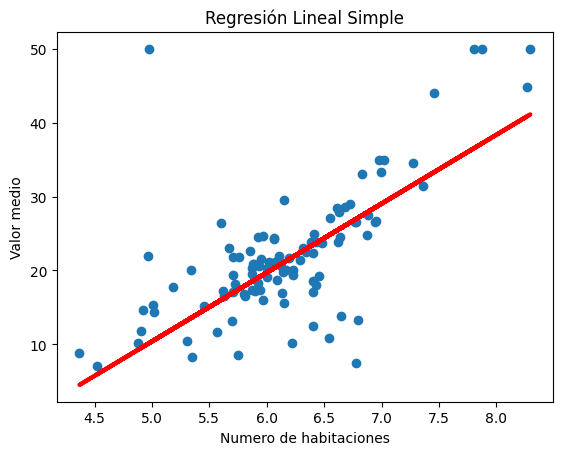

In [95]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [96]:
print('DATOS EL MODELO REGRESION LINEAL SIMPLE')
print('Valor de la pendiente o coeficiente a')
print(lr.coef_)
print('valor de la intersección o coeficiente b')
print(lr.intercept_)

DATOS EL MODELO REGRESION LINEAL SIMPLE
Valor de la pendiente o coeficiente a
[[9.32441472]]
valor de la intersección o coeficiente b
[-36.22759187]


In [97]:
#Precisión o error del algortimo, R cuadrado
print(lr.score(X_train, y_train))

0.4923961655545104


In [98]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## **REGRESIÓN LINEAL MÚLTIPLE**

In [99]:
#Seleccionamos las columnas 5,6 y 7 del dataset
#X_multiple=boston.data[:,5:8]
X_multiple=boston[['RM','DIS', 'RAD']]
print(X_multiple)

        RM     DIS  RAD
0    6.575  4.0900    1
1    6.421  4.9671    2
2    7.185  4.9671    2
3    6.998  6.0622    3
4    7.147  6.0622    3
..     ...     ...  ...
501  6.593  2.4786    1
502  6.120  2.2875    1
503  6.976  2.1675    1
504  6.794  2.3889    1
505  6.030  2.5050    1

[506 rows x 3 columns]


In [101]:
#Defino los datos de la variable y
#y_multiple=boston.target
y_multiple=boston[['MEDV']]

In [102]:
from sklearn.model_selection import train_test_split

#separo los datos de train (entrenamiento) y test (prueba) para probar el algoritmo
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)
#Se usa 20% de datos para prueba

In [103]:
y_test.shape

(102, 1)

In [104]:
#Defino el modelo a utilizar
lr_multiple=linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_train, y_train)
#Realizo la prediccion
y_pred_multiple=lr_multiple.predict(X_test)

In [105]:
print('DATOS EL MODELO REGRESION LINEAL MULTIPLE')
print('Valor de la pendiente o coeficiente a')
print(lr_multiple.coef_)
print('valor de la intersección o coeficiente b')
print(lr_multiple.intercept_)

DATOS EL MODELO REGRESION LINEAL MULTIPLE
Valor de la pendiente o coeficiente a
[[ 8.10410029  0.0713235  -0.25521475]]
valor de la intersección o coeficiente b
[-26.20260551]


In [106]:
#Precisión o error del algoritmo de la Regresión Lineal Múltiple.
print(lr_multiple.score(X_train, y_train))

0.5410317705865038


## **REGRESIÓN POLINOMIAL**

In [ ]:
#Seleccionamos la columna 6 del dataset
X_p=boston.data[:,np.newaxis,5]

In [ ]:
#Seleccionamos las columnas 5,6 y 7 del dataset
X_p=boston.data[:,5:8]
print(X_multiple)

In [ ]:
X_p.shape

In [ ]:
#Defino los datos de la variable y
y_p=boston.target

In [ ]:
#Graficamos los datos correspondientes
plt.scatter(X_p,y_p)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#separo los datos de train (entrenamiento) y test (prueba) para probar el algoritmo
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=5)
#Se usa 20% de datos para prueba

In [ ]:
X_test_p

In [ ]:
train_test_split?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio del modelo a utilizar
poli_reg=PolynomialFeatures(degree=2)
#Se transforman las características existentes en características de mayor grado
X_train_poli=poli_reg.fit_transform(X_train_p)
X_test_poli=poli_reg.fit_transform(X_test_p)

In [ ]:
#Defino el algortimo a utilizar
pr=linear_model.LinearRegression()
pr.fit(X_train_poli, y_train_p)
#Realizo la prediccion
y_pred_pr=pr.predict(X_test_poli)

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test_p,y_test_p)
plt.plot(X_test_p,y_pred_pr, color='red', linewidth=3)
plt.title('Regresión Polinomio 2')
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [ ]:
print('DATOS EL MODELO REGRESION POLINOMIAL')
print('Valor de la pendiente o coeficiente a')
print(pr.coef_)
print('valor de la intersección o coeficiente b')
print(pr.intercept_)

In [ ]:
#Precisión o error del algoritmo de la Regresión Lineal Múltiple.
print(pr.score(X_train_poli, y_train_p))

## **REGRESIÓN CON VECTORES DE SOPORTE**

In [ ]:
#Seleccionamos la columna 6 del dataset
X_svr=boston.data[:,np.newaxis,5]
#Defino los datos de la variable y
y_svr=boston.target

In [ ]:
#Graficamos los datos correspondientes
plt.scatter(X_svr,y_svr)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#separo los datos de train (entrenamiento) y test (prueba) para probar el algoritmo
X_train, X_test, y_train, y_test = train_test_split(X_svr, y_svr, test_size=0.2)
#Se usa 20% de datos para prueba

In [ ]:
#Defino el algoritmo a utilizar
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
#Realizo la prediccion
y_pred_svr=svr.predict(X_test)

In [ ]:
y_test

In [ ]:
y_pred_svr

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_svr, color='red', linewidth=3)
plt.title('Regresión SV')
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [ ]:
#Precisión o error del algoritmo de Vectores de Soporte.
print(svr.score(X_train, y_train))

## **ÁRBOLES DE DECISION REGRESION**

In [ ]:
#Seleccionamos la columna 6 del dataset
X_adr=boston.data[:,np.newaxis,5]
#Defino los datos de la variable y
y_adr=boston.target

In [ ]:
X_adr

In [ ]:
#Graficamos los datos correspondientes
plt.scatter(X_adr,y_adr)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#separo los datos de train (entrenamiento) y test (prueba) para probar el algoritmo
X_train, X_test, y_train, y_test = train_test_split(X_adr, y_adr, test_size=0.2)
#Se usa 20% de datos para prueba

In [ ]:
#Defino el algoritmo a utilizar
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth=9)
adr.fit(X_train, y_train)
#Realizo la prediccion
y_pred_adr=adr.predict(X_test)

In [ ]:
y_test

In [ ]:
y_pred_adr

In [ ]:
#Graficamos los datos junto con el modelo o la predicción
X_grid=np.arange(min(X_test),max(X_test),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_test,y_test)
plt.plot(X_grid,adr.predict(X_grid),color='green', linewidth=3)
plt.show()

In [ ]:
#Precisión o error del algoritmo de la Regresión Lineal Múltiple.
print(adr.score(X_train, y_train))

In [ ]:
#Seleccionamos las columnas 5,6 y 7 del dataset
X_adr=boston.data
print(X_adr)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
plot_tree?

In [ ]:
fig = plt.figure(figsize=(80, 70))
plot_tree(adr, max_depth=3,
          feature_names=X_adr,
          class_names=y_adr, 
          filled=True, impurity=True, 
          rounded=True)